In [3]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

# Thực hành buổi 4
## Tiền xử lý dữ liệu

In [4]:
df = pd.read_excel("CAR_DATA.xlsx")
df

,Brand,Model,Year,Transmission,Fuel_Type,Mileage,Doors,Price
0,Kia,Rio,2020,Manual,Diesel,289944,3,8501
1,Chevrolet,Malibu,2012,Automatic,Hybrid,5356,2,12092
2,Mercedes,GLA,2020,Automatic,Diesel,231440,4,11171
3,Audi,Q5,2023,Manual,Electric,160971,2,11780
4,Volkswagen,Golf,2003,Semi-Automatic,Hybrid,286618,3,2867
...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,Semi-Automatic,Diesel,5794,2,8884
9996,Chevrolet,Impala,2002,Automatic,Electric,168000,2,6240
9997,BMW,3 Series,2010,Automatic,Petrol,86664,5,9866
9998,Ford,Explorer,2002,Automatic,Hybrid,225772,4,4084


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         10000 non-null  object
 1   Model         10000 non-null  object
 2   Year          10000 non-null  int64 
 3   Transmission  10000 non-null  object
 4   Fuel_Type     10000 non-null  object
 5   Mileage       10000 non-null  int64 
 6   Doors         10000 non-null  int64 
 7   Price         10000 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 625.1+ KB


In [6]:
df.dtypes

Brand           object
Model           object
Year             int64
Transmission    object
Fuel_Type       object
Mileage          int64
Doors            int64
Price            int64
dtype: object

In [7]:
df.head(10)

,Brand,Model,Year,Transmission,Fuel_Type,Mileage,Doors,Price
0,Kia,Rio,2020,Manual,Diesel,289944,3,8501
1,Chevrolet,Malibu,2012,Automatic,Hybrid,5356,2,12092
2,Mercedes,GLA,2020,Automatic,Diesel,231440,4,11171
3,Audi,Q5,2023,Manual,Electric,160971,2,11780
4,Volkswagen,Golf,2003,Semi-Automatic,Hybrid,286618,3,2867
5,Toyota,Camry,2007,Automatic,Petrol,157889,4,7242
6,Honda,Civic,2010,Automatic,Electric,139584,3,11208
7,Kia,Sportage,2001,Semi-Automatic,Electric,157495,2,7950
8,Kia,Sportage,2014,Manual,Hybrid,98700,3,9926
9,Toyota,RAV4,2005,Manual,Petrol,107724,2,6545


In [8]:
df.Fuel_Type.value_counts()

Fuel_Type
Electric    2625
Diesel      2512
Hybrid      2453
Petrol      2410
Name: count, dtype: int64

In [9]:
df = pd.get_dummies(df, columns = ["Brand","Model","Transmission","Fuel_Type"])
df

,Year,Mileage,Doors,Price,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,Brand_Hyundai,...,Model_Tiguan,Model_Tucson,Model_X5,Transmission_Automatic,Transmission_Manual,Transmission_Semi-Automatic,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol
0,2020,289944,3,8501,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
1,2012,5356,2,12092,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,2020,231440,4,11171,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
3,2023,160971,2,11780,True,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
4,2003,286618,3,2867,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2004,5794,2,8884,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
9996,2002,168000,2,6240,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
9997,2010,86664,5,9866,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
9998,2002,225772,4,4084,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False


## Chuẩn hóa Min Max

In [10]:
from sklearn.preprocessing import MinMaxScaler

#Đổi dữ liệu từ dặm sang kilomet
df = df.rename(columns = {"Mileage" : "Kilometer"})
df.Kilometer = df.Kilometer.apply(lambda x: x*1.60934)
df.head()

,Year,Kilometer,Doors,Price,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,Brand_Hyundai,...,Model_Tiguan,Model_Tucson,Model_X5,Transmission_Automatic,Transmission_Manual,Transmission_Semi-Automatic,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol
0,2020,466618.47696,3,8501,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
1,2012,8619.62504,2,12092,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,2020,372465.64960,4,11171,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
3,2023,259057.06914,2,11780,True,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
4,2003,461265.81212,3,2867,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False


In [11]:
#Chuẩn hóa min max
scaler = MinMaxScaler(feature_range = (0,1))
df["Kilometer"] = scaler.fit_transform(df[["Kilometer"]])

scaler = MinMaxScaler(feature_range=(0,1))
df["Price"] = scaler.fit_transform(df[["Price"]])

df

,Year,Kilometer,Doors,Price,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,Brand_Hyundai,...,Model_Tiguan,Model_Tucson,Model_X5,Transmission_Automatic,Transmission_Manual,Transmission_Semi-Automatic,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol
0,2020,0.966648,3,0.398810,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
1,2012,0.017775,2,0.619103,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,2020,0.771584,4,0.562604,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
3,2023,0.536626,2,0.599963,True,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
4,2003,0.955558,3,0.053187,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2004,0.019235,2,0.422305,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
9996,2002,0.560062,2,0.260107,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
9997,2010,0.288872,5,0.482547,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
9998,2002,0.752686,4,0.127845,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False


In [12]:
Data = pd.read_excel("CAR_DATA.xlsx")
Data

,Brand,Model,Year,Transmission,Fuel_Type,Mileage,Doors,Price
0,Kia,Rio,2020,Manual,Diesel,289944,3,8501
1,Chevrolet,Malibu,2012,Automatic,Hybrid,5356,2,12092
2,Mercedes,GLA,2020,Automatic,Diesel,231440,4,11171
3,Audi,Q5,2023,Manual,Electric,160971,2,11780
4,Volkswagen,Golf,2003,Semi-Automatic,Hybrid,286618,3,2867
...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,Semi-Automatic,Diesel,5794,2,8884
9996,Chevrolet,Impala,2002,Automatic,Electric,168000,2,6240
9997,BMW,3 Series,2010,Automatic,Petrol,86664,5,9866
9998,Ford,Explorer,2002,Automatic,Hybrid,225772,4,4084


In [13]:
X = Data.iloc[:, :-1]
X

,Brand,Model,Year,Transmission,Fuel_Type,Mileage,Doors
0,Kia,Rio,2020,Manual,Diesel,289944,3
1,Chevrolet,Malibu,2012,Automatic,Hybrid,5356,2
2,Mercedes,GLA,2020,Automatic,Diesel,231440,4
3,Audi,Q5,2023,Manual,Electric,160971,2
4,Volkswagen,Golf,2003,Semi-Automatic,Hybrid,286618,3
...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,Semi-Automatic,Diesel,5794,2
9996,Chevrolet,Impala,2002,Automatic,Electric,168000,2
9997,BMW,3 Series,2010,Automatic,Petrol,86664,5
9998,Ford,Explorer,2002,Automatic,Hybrid,225772,4


In [14]:
y = Data.iloc[:, -1]
y

0        8501
1       12092
2       11171
3       11780
4        2867
        ...  
9995     8884
9996     6240
9997     9866
9998     4084
9999     3342
Name: Price, Length: 10000, dtype: int64

In [15]:
X = pd.get_dummies(X, dtype = int)
X.head(10)

,Year,Mileage,Doors,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Kia,...,Model_Tiguan,Model_Tucson,Model_X5,Transmission_Automatic,Transmission_Manual,Transmission_Semi-Automatic,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol
0,2020,289944,3,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
1,2012,5356,2,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,2020,231440,4,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,2023,160971,2,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,2003,286618,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5,2007,157889,4,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
6,2010,139584,3,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
7,2001,157495,2,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
8,2014,98700,3,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
9,2005,107724,2,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X["Mileage"] = scaler.fit_transform(X[["Mileage"]])
X

,Year,Mileage,Doors,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Kia,...,Model_Tiguan,Model_Tucson,Model_X5,Transmission_Automatic,Transmission_Manual,Transmission_Semi-Automatic,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol
0,2020,0.966648,3,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
1,2012,0.017775,2,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,2020,0.771584,4,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,2023,0.536626,2,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,2003,0.955558,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2004,0.019235,2,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
9996,2002,0.560062,2,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9997,2010,0.288872,5,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9998,2002,0.752686,4,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.36, random_state=4)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6400, 50), (3600, 50), (6400,), (3600,))

## KNN Regression

In [19]:
#KNN Regression
from sklearn.neighbors import KNeighborsRegressor
knn_Reg = KNeighborsRegressor(n_neighbors = 10)
knn_Reg.fit(X_train, y_train)
y_pred_knn=knn_Reg.predict(X_test)
print(pd.DataFrame({"y_test":y_test, "y_predicted":y_pred_knn}).head(10))

      y_test  y_predicted
1603    9552      10557.5
8713    7418       9027.3
4561   11674       8499.3
6600    7094       8661.2
2558    7085       7667.0
7642   14486      12622.9
8912    9698       9391.2
3319   17386      12285.7
6852    5809       7617.8
1366   12620      12166.8


In [20]:
from sklearn.metrics import mean_absolute_error
# root_mean_squared_error bị lỗi, không có tìm thấy

In [31]:
MAE_KNN=mean_absolute_error(y_test, y_pred_knn)
#RMSE_KNN=root_mean_squared_error(y_test, y_pred_knn)

print("MAE_KNN : ", MAE_KNN)
#print("RMSE_KNN : ", RMSE_KNN)

MAE_KNN :  1558.1304444444443


## Linear Regression
### y = coef_ * x + intercept

In [24]:
#Hồi quy đa biến
from sklearn.linear_model import LinearRegression
Linear_Reg = LinearRegression()

Linear_Reg.fit(X_train, y_train)

w = Linear_Reg.coef_
np.set_printoptions(suppress=True) 
print(w)

[  299.57385998 -5933.16879515   -20.20443427     8.72043232
   -11.00229913     8.15626741    48.27546196   -40.85829263
   -10.57517901    34.03138356    24.96703861   -36.0395088
   -25.6753043      4.90062382    38.19243727   -57.64003958
    -5.73217616    67.40532368   -28.41031912    10.34989769
    10.00093005  -118.613514     -53.96364077    37.39056348
    80.97889017   -14.68214878     5.12025343    64.15181627
   -20.99660773    15.98679426   -26.17745017    46.50958802
   -23.67117183   -30.22321591   -24.39892549    72.09264807
     7.92320193    50.63728903   -89.79289233    13.61731044
    24.90107136    -1.76117686   -54.09536022  1003.28447285
  -498.31589861  -504.96857425  -743.1158359   1229.97048539
   242.50515509  -729.35980458]


In [25]:
w0 = Linear_Reg.intercept_
np.set_printoptions(suppress=True)  
print(w0)

-590749.3580495415


In [22]:
y_predicted = Linear_Reg.predict(X_test)
print(pd.DataFrame({"y_test":y_test, "y_predicted":y_predicted}).head(10))

      y_test   y_predicted
1603    9552   9812.769359
8713    7418   8936.951272
4561   11674  11972.081220
6600    7094   8322.901041
2558    7085   7755.200729
7642   14486  13256.743602
8912    9698   8122.832480
3319   17386  15599.165737
6852    5809   5542.438762
1366   12620  12662.137280


## Đánh giá lỗi

In [29]:
MAE_Linear=mean_absolute_error(y_test, y_predicted)
print("MAE_Linear : ", MAE_Linear)

MAE_Linear :  989.5151397942702


## So sánh kết quả

In [32]:
import matplotlib.pyplot as plt
x=["MAE_Linear","MAE_KNN"]
y=[MAE_Linear,MAE_KNN]
y

[989.5151397942702, 1558.1304444444443]

Text(0.5, 1.0, 'So sánh KNN ')

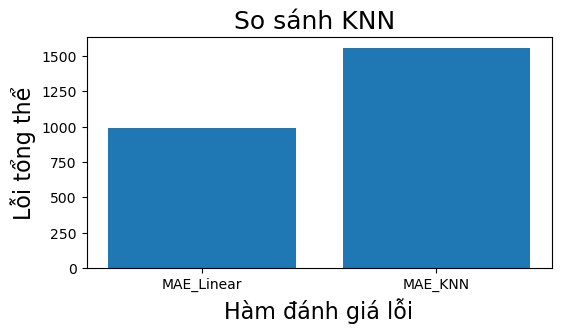

In [33]:
plt.figure(figsize=(6,3))
plt.bar(x,y)
plt.xlabel("Hàm đánh giá lỗi",fontsize=16)
plt.ylabel("Lỗi tổng thể", fontsize=16)
plt.title("So sánh KNN ",fontsize=18)